In [10]:
import numpy as np
import csv

data = None
with open('board_data.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

data = np.array(data[1:])
display(data)

array([['51', 'FAA.K.FGH.KLFGHXXLBBBJ.L..IJCCDDIEE.'],
       ['50', '..HAAA..HJ..XXIJ.KBBICCKFGDD.KFGEE..'],
       ['49', 'AAAJKLGBBJKLG.XXKLCCI....HIDD..HEEFF'],
       ...,
       ['02', '...A.....A..XX.A....................'],
       ['02', '....A.....A.XX..A...................'],
       ['01', '............XX......................']], dtype='<U36')

In [21]:
print(len(x_data))

476118


In [67]:
x_data = data[:,1]

def string_to_list(s):
	return list(s)

x_data_unshaped = np.array([string_to_list(s) for s in x_data])

x_data = x_data_unshaped.reshape(476118, 36)

to_ascii = np.vectorize(ord)
x_data = to_ascii(x_data)

# def split_string(string):
# 	return np.array([x for x in list(string)])

# split_func = np.vectorize(split_string)
# x_data = split_func(x_data_unsplit)

display(x_data.shape)

(476118, 36)

In [68]:
display(x_data)

array([[70, 65, 65, ..., 69, 69, 46],
       [46, 46, 72, ..., 69, 46, 46],
       [65, 65, 65, ..., 69, 70, 70],
       ...,
       [46, 46, 46, ..., 46, 46, 46],
       [46, 46, 46, ..., 46, 46, 46],
       [46, 46, 46, ..., 46, 46, 46]])

In [43]:
y_data = data[:,0]

y_data = y_data.astype(int)
display(y_data)

array([51, 50, 49, ...,  2,  2,  1])

In [44]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, test_size = 0.3)

In [72]:
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_x, train_y, val_x, val_y, epochs=20):
    model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['mean_squared_error'])

    history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs = epochs)

    fig, axs = plt.subplots(1,2,figsize=(20,5))

    for i, metric in enumerate(['loss', 'mean_squared_error']):
        axs[i].plot(history.history[metric])
        axs[i].plot(history.history['val_'+metric])
        axs[i].legend(['training', 'validation'], loc='best')

        axs[i].set_title('Model '+metric)
        axs[i].set_ylabel(metric)
        axs[i].set_xlabel('epoch')

    plt.show()

Epoch 1/20
10416/10416 [==============================] - 18s 2ms/step - loss: 33.1280 - mean_squared_error: 33.1280 - val_loss: 12.1039 - val_mean_squared_error: 12.1039
Epoch 2/20
10416/10416 [==============================] - 17s 2ms/step - loss: 11.4535 - mean_squared_error: 11.4535 - val_loss: 11.3392 - val_mean_squared_error: 11.3392
Epoch 3/20
10416/10416 [==============================] - 14s 1ms/step - loss: 10.7038 - mean_squared_error: 10.7038 - val_loss: 11.1624 - val_mean_squared_error: 11.1624
Epoch 4/20
10416/10416 [==============================] - 15s 1ms/step - loss: 10.4171 - mean_squared_error: 10.4171 - val_loss: 9.7521 - val_mean_squared_error: 9.7521
Epoch 5/20
10416/10416 [==============================] - 16s 2ms/step - loss: 10.1696 - mean_squared_error: 10.1696 - val_loss: 10.1120 - val_mean_squared_error: 10.1120
Epoch 6/20
10416/10416 [==============================] - 15s 1ms/step - loss: 9.9767 - mean_squared_error: 9.9767 - val_loss: 10.1163 - val_mean_s

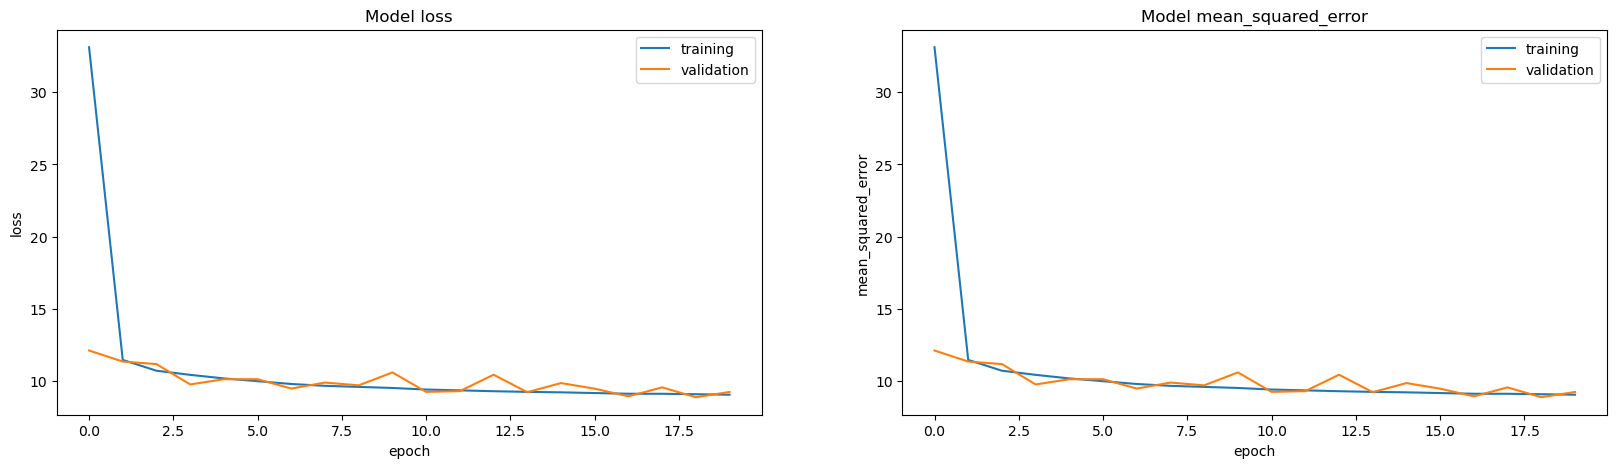

In [73]:

model = models.Sequential()

model.add(layers.Dense(units=36, activation='relu', input_shape = (36,)))
model.add(layers.Dense(units=72, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))

train_and_evaluate(model, x_train, y_train, x_test, y_test)